In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [45]:
""""
    This task seeks to apply K-Nearest Neighbor Classifier on a classification problem. We will try to see if a patient has diabetes or not from a set of given info
 """
try:
    df=pd.read_csv("diabetes.csv")
    print ("This dataset has {} samples with {} features ".format(*df.shape))
except:
    print ('The dataset could not be loaded! Is the data missing ?')
        
df.head(5)


This dataset has 768 samples with 9 features 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
df.shape

(768, 9)

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
mapping ={1:"yes", 0:'no'}

df['Outcome']=df['Outcome'].map(mapping)

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,no
764,2,122,70,27,0,36.8,0.340,27,no
765,5,121,72,23,112,26.2,0.245,30,no
766,1,126,60,0,0,30.1,0.349,47,yes


<Axes: >

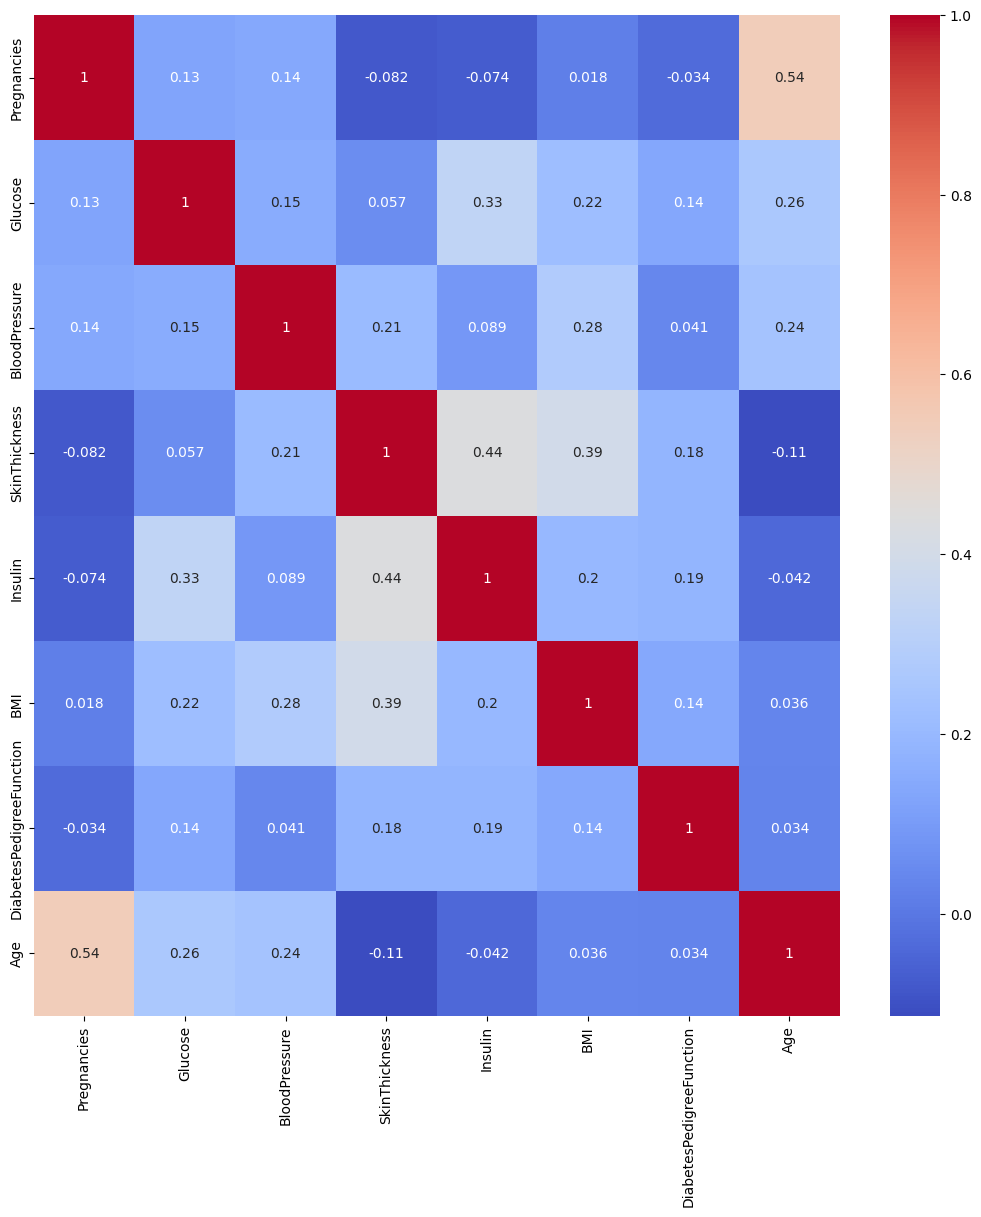

In [28]:
# Now lets display the correlation matrix in heatmap using seaborn plot 
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_ = numeric_df.corr()
corr_
fig, ax=plt.subplots(figsize=(13,13))
sns.heatmap(corr_, annot=True, cmap='coolwarm')

## The correlation plot does not show any 1 to 1 correlation between the features so all the features are informative and relevant

#### Feature Selection

In [29]:
X = df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [30]:
X.shape, y.shape

((768, 8), (768,))

#### Splitting data into training and testing Data

In [31]:
# It is time to split the data into training set and test set
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [32]:
# from sklearn.neighbors import KNeighborsClassifier

#Lets create our model
KNN_Classifier=KNeighborsClassifier()


In [33]:
# Now let us train our model on the training data
KNN_Classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
# We fit the classifier using the features and labels from the training set. To get predictions from the ...
# trained model we use the predict method on the classifier , passing in features from the test set

y_pred=KNN_Classifier.predict(X_test)

### Evaluation of our trained Model 

In [35]:
# Now lets test the accuracy of our model

from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test,y_pred)
print('The accuracy of our model is {:.3f}'.format(accuracy))

The accuracy of our model is 0.771


### Pickle File 


In [39]:
# Create a pickle file to save the model 

import pickle
with open('Classifier.pkl','wb') as file:    
    pickle.dump(KNN_Classifier, file)
    

In [41]:
with open('Classifier.pkl','rb') as file:
    KNN_prediction =pickle.load(file)
    

In [43]:
prediction =KNN_prediction.predict([[0,150,40,35,168,43.1,2.288,33]])
print (prediction)

['yes']


/Users/bullet/Desktop/Machine_Learning projects_2024/KNN_classifier_Deployment_FastAPI/kNNvenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
# x=[0,137,40,35,168,43.1,2.288,33]
x=[0,150,40,35,168,43.1,2.288,33]
# x=[[1,89,66,23,94,28.1,0.167,21]
   
x_array=np.array(x)
x_reshaped=x_array.reshape(1,-1)
Model_Pred=KNN_Classifier.predict(x_reshaped)

print("Model_Prediction for our set of data =", Model_Pred)

Model_Prediction for our set of data = ['yes']


/Users/bullet/Desktop/Machine_Learning projects_2024/KNN_classifier_Deployment_FastAPI/kNNvenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
